In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})
sns.set_style("white")
import math
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from SpectralClustering import MySpectralClustering

Text(0.5, 1.0, 'Labels returned by KMeans')

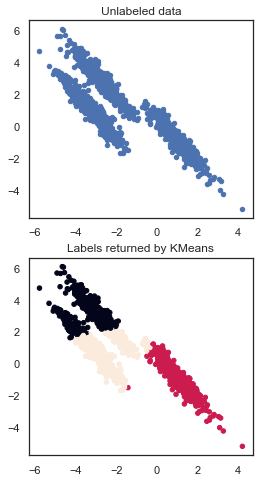

In [2]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

transformation = np.array([[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])
X_aniso = np.dot(X, transformation)

plt.figure(figsize=(4,8))
plt.subplot(211)
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=20)
plt.title("Unlabeled data")

y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)
plt.subplot(212)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=y_pred, s=20)
plt.title("Labels returned by KMeans")

In [3]:
mysc = MySpectralClustering(6.4)
mysc.fit(X_aniso, 3)

In [4]:
mylabels = mysc.labels
print(mylabels.shape)

(1500,)


Text(0.5, 1.0, 'Labels returned by MySpectralClustering')

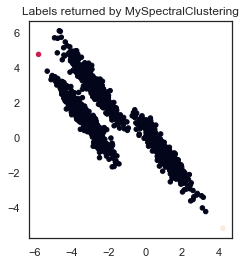

In [5]:
plt.figure(figsize=(8,4))
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=20)
plt.title("Unlabeled data")

plt.subplot(122)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=mylabels, s=20)
plt.title("Labels returned by MySpectralClustering")

In [6]:
sort_idxs = np.argsort(mysc.evals)
for e in mysc.evals:
    print(e)

(1.2908090075402926e-14+0j)
(1.0063616536131271e-05+0j)
(0.002109036144602634+0j)
(0.012319710660866274+0j)
(0.08402226611790607+0j)
(0.11190864697427758+0j)
(0.18393778414195852+0j)
(0.4179736684631687+0j)
(0.8165997998700428+0j)
(1.0011536554164262+0j)
(1.2543928601144267+0j)
(1.3868049510094649+0j)
(1.4331964869623302+0j)
(1.6096505443335476+0j)
(1.6243177230669068+0j)
(1.7078142886478251+0j)
(1.7749314137800343+0j)
(2.0412218107139948+0j)
(2.295512530652048+0j)
(2.3793991408251247+0j)
(2.485836678950369+0j)
(2.9376564218452423+0j)
(2.9955190340036526+0j)
(3.045313110708738+0j)
(3.348915710748632+0j)
(3.4869933722998736+0j)
(3.571356990907859+0j)
(3.666602666539416+0j)
(3.734131648444367+0j)
(3.9355669431510436+0j)
(4.124961551568924+0j)
(4.2402069162759055+0j)
(4.264701257104256+0j)
(4.382658960200752+0j)
(4.4658783840084295+0j)
(4.859432820181919+0j)
(5.074899901644219+0j)
(5.08798067257209+0j)
(5.094444855034668+0j)
(5.179108855056525+0j)
(5.426669076288254+0j)
(5.492655997313605

(88.1982697836469+0j)
(88.35647480355918+0j)
(88.3915884996703+0j)
(88.45559591978227+0j)
(88.47775439327215+0j)
(88.69710466194417+0j)
(88.75381985713157+0j)
(88.85516422978604+0j)
(88.88223729188869+0j)
(88.8878302713915+0j)
(88.92767673781181+0j)
(88.95852117133721+0j)
(89.02681759715065+0j)
(89.14199328131551+0j)
(89.16466875665951+0j)
(89.17687515255543+0j)
(89.19439705385098+0j)
(89.24733363597961+0j)
(89.24847950992472+0j)
(89.30449175068414+0j)
(89.41607944443122+0j)
(89.42209380087843+0j)
(89.44495745636343+0j)
(89.49780468750141+0j)
(89.4994897786651+0j)
(89.56119924628257+0j)
(89.60968668369956+0j)
(89.61988043359149+0j)
(89.65096958479172+0j)
(89.68269922585019+0j)
(89.706414522089+0j)
(89.72162878641602+0j)
(89.7260526902081+0j)
(89.77657361245119+0j)
(89.80080307597328+0j)
(89.86546757628344+0j)
(89.8920238386329+0j)
(90.0206807711568+0j)
(90.10239126663195+0j)
(90.11822301025133+0j)
(90.32337975459181+0j)
(90.32545421900463+0j)
(90.41118155720663+0j)
(90.43984663283321+0

In [7]:
# Function for creating datapoints in the form of a circle
np.random.seed(42)

def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

# Creating data points in the form of a circle
df = pd.DataFrame(PointsInCircum(500,1000), dtype=float)
df = df.append(PointsInCircum(300,700))
df = df.append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df.append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

X = df.values
print(X.shape)

(2300, 2)


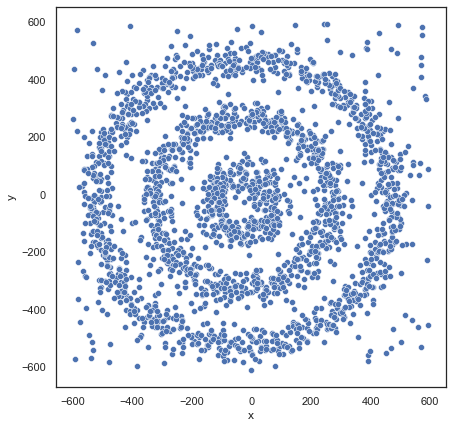

In [8]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
mysc2 = MySpectralClustering(5)
mysc2.fit(X, 3)

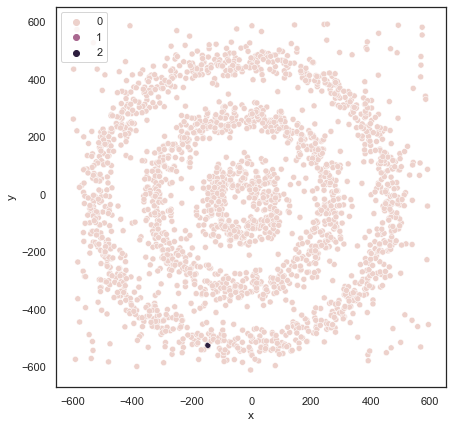

In [10]:
sns.scatterplot(X[:,0], X[:, 1], hue=mysc2.labels)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
print(mysc.evecs.shape)

(1500, 1500)


In [12]:
print(mysc2.labels)

[0 0 0 ... 0 0 0]


In [22]:
print(mysc2.evecs.shape)

(2300, 2300)


In [14]:
from KMeans import MyKMeans
mkm = MyKMeans()
mkm.fit(mysc2.evecs[:,0:3], 3)

In [15]:
print(mkm.clusters)
for x in mkm.clusters:
    print(x)

[1. 1. 1. ... 1. 1. 1.]
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [16]:
print(mkm.centroids)

[[-1.32845780e-006 -5.03183440e-018  1.29689625e-007]
 [ 4.47506561e-004 -6.32974256e-004  6.32662586e-004]
 [-1.32520334e-005  0.00000000e+000  7.02667778e-108]]


In [17]:
sns.scatterplot(X_aniso[:,0], X_aniso[:, 1], hue=mkm.clusters)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

ValueError: arrays must all be same length

In [ ]:
for ev in mysc2.evecs:
    print(ev)

In [ ]:
for evl in np.real(mysc2.evals):
    print(evl)

In [ ]:
for i in range(1500):
    print(mysc2.D[i][i])

In [21]:
for e in mysc2.evals:
    print(e)

(-2.7755575615628914e-16+0j)
(-1.1015496652514563e-16+0j)
(-1.0671677987989596e-16+0j)
(-1.0071696033640088e-16+0j)
(-9.96855744334267e-17+0j)
(-9.570700718423512e-17+0j)
(-9.520697881140395e-17+0j)
(-9.272147594296635e-17+0j)
(-8.918975021095282e-17+0j)
(-8.760210075775701e-17+0j)
(-8.664066013033505e-17+0j)
(-8.638051355677882e-17+0j)
(-8.378250896374e-17+0j)
(-8.050731823884137e-17+0j)
(-8.032244509077856e-17+0j)
(-8.009308810992853e-17+0j)
(-7.954257643954131e-17+0j)
(-7.607708714198972e-17+0j)
(-7.04483417210078e-17+0j)
(-7.014887645259124e-17+0j)
(-6.635488652074625e-17+0j)
(-6.604361445231501e-17+0j)
(-6.072614678889613e-17+0j)
(-5.964089654647262e-17+0j)
(-5.643893107491022e-17+0j)
(-5.559296241705082e-17+0j)
(-4.5313350548514306e-17+0j)
(-4.3605822787285006e-17+0j)
(-4.305197891411961e-17+0j)
(-4.127563924882197e-17+0j)
(-3.930934147388013e-17+0j)
(-3.9110110521960524e-17+0j)
(-3.547351662371567e-17+0j)
(-3.08263853602641e-17+0j)
(-3.042190784284414e-17+0j)
(-2.722333841488909

0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
0j
(1.663265562503184e-111+0j)
(2.118340758284083e-107+0j)
(2.56969962527704e-84+0j)
(7.389

(6.0061311548751326e-24+0j)
(7.46459959909945e-24+0j)
(8.801308513761173e-24+0j)
(9.85646067696848e-24+0j)
(1.0372836546604107e-23+0j)
(1.328461349846708e-23+0j)
(1.5407610386660142e-23+0j)
(2.0177618250871108e-23+0j)
(2.566552177953072e-23+0j)
(2.849020897402783e-23+0j)
(3.1740819322011734e-23-4.3562567573333394e-23j)
(3.1740819322011734e-23+4.3562567573333394e-23j)
(4.281139451665457e-23+0j)
(8.986853581403134e-23+0j)
(1.244149441073425e-22-1.5039502212376768e-21j)
(1.244149441073425e-22+1.5039502212376768e-21j)
(1.5799953697534544e-22+0j)
(1.9287498479639185e-22+0j)
(2.557322628189483e-22+0j)
(2.6722261207983255e-22+0j)
(3.751333250955551e-22+0j)
(3.955023252909266e-22+0j)
(6.352747104407253e-22+0j)
(6.45488244705924e-22+0j)
(1.135862535921016e-21+0j)
(1.2197810764637612e-21+0j)
(1.6449213282873482e-21+0j)
(5.016394360956677e-21+0j)
(1.895074915138861e-20+0j)
(4.7645768964731706e-20+0j)
(4.941301991097808e-20+0j)
(5.421010862427522e-20+0j)
(5.950933307342999e-20+0j)
(6.1118020945227

In [23]:
sortevals = np.real(mysc2.evals)
sort_idxs = np.argsort(sortevals)
sortevals = sortevals[sort_idxs]
for ev in sortevals:
    print(ev)

-2.7755575615628914e-16
-1.1015496652514563e-16
-1.0671677987989596e-16
-1.0071696033640088e-16
-9.96855744334267e-17
-9.570700718423512e-17
-9.520697881140395e-17
-9.272147594296635e-17
-8.918975021095282e-17
-8.760210075775701e-17
-8.664066013033505e-17
-8.638051355677882e-17
-8.378250896374e-17
-8.050731823884137e-17
-8.032244509077856e-17
-8.009308810992853e-17
-7.954257643954131e-17
-7.607708714198972e-17
-7.04483417210078e-17
-7.014887645259124e-17
-6.635488652074625e-17
-6.604361445231501e-17
-6.072614678889613e-17
-5.964089654647262e-17
-5.643893107491022e-17
-5.559296241705082e-17
-4.5313350548514306e-17
-4.3605822787285006e-17
-4.305197891411961e-17
-4.127563924882197e-17
-3.930934147388013e-17
-3.9110110521960524e-17
-3.547351662371567e-17
-3.08263853602641e-17
-3.042190784284414e-17
-2.722333841488909e-17
-2.4863334055676072e-17
-1.7117349343393848e-17
-1.652933342606362e-17
-1.528336444203823e-17
-1.376523958870005e-17
-1.3729007662620895e-17
-1.34715687673959e-17
-1.25008

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.663265562503184e-111
2.118340758284083e-107
2.56969962527704e-84
7.389811049480572e-78
5.001280593948942e-72
1.6243794761075582e-63
4.283038570463672e-63
6.56383836806081e-63
5.292865412682445e-62
4.479593117535703e-60
5.670067297274775e-60
4.821845166117704e-59
2.6003479288799914e-58
2.6003479288799914e-58
7.055983321608164e-56
1.68462914146459e-55
1.8913669947019607e-55
1.8913669947019607e-55
2.8561157972684676e-55
4.62118109351901e-55
4.62118109351901e-55
6.804062020428965e-55
8.910780710123826e-55
9.221443801593876e-

7.46021698617437e-36
7.46021698617437e-36
8.648010721275946e-36
9.648884637291108e-36
9.648884637291108e-36
9.756119026483061e-36
9.778361065044547e-36
1.0645563304567356e-35
1.0645563304567356e-35
1.1475091414738054e-35
1.1475091414738054e-35
1.2757351106463023e-35
1.2757351106463023e-35
1.277935014257877e-35
1.277935014257877e-35
1.4830197062639646e-35
1.4830197062639646e-35
1.6588366476486905e-35
1.8459685679566704e-35
1.9392735784631576e-35
1.9754670968112727e-35
1.9754670968112727e-35
2.0363550518056523e-35
2.0363550518056523e-35
2.0641584602922824e-35
2.1720102014973806e-35
2.2888682295404942e-35
2.2888682295404942e-35
2.3133723129963234e-35
2.3133723129963234e-35
2.4570373200841076e-35
2.642987819003647e-35
2.703459630225498e-35
2.724013726552696e-35
2.8516214667332224e-35
3.0122362894412844e-35
3.1506411265310287e-35
3.4878742589591273e-35
3.738272349470866e-35
3.738272349470866e-35
3.928083706942786e-35
3.928083706942786e-35
3.9997907518317984e-35
4.0842296802816687e-35
4.1718

1.5569291657600686
